In [28]:
import numpy as np 
import pandas as pd
import datetime # para convertir a dia de la semana
import calendar # idem

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# estatus = pd.read_csv('status.csv', sep='\t', iterator=True, chunksize=1000)
#cada vez que se corre son los proximos 500
# estatus.get_chunk(500)

In [30]:
trips = pd.read_csv('trip.csv', low_memory=False)
#Se convierte los dates a datetime64[ns].
trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

In [31]:
# ejemplo del uso de datetime con día actual
dia_actual = datetime.datetime.today()
dia_actual

datetime.datetime(2017, 4, 16, 5, 45, 21, 846509)

In [32]:
# lo paso a dia de la semana
dia_actual.weekday()

6

In [33]:
# mejor en palabras que en números
calendar.day_name[dia_actual.weekday()]

'Sunday'

In [34]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

In [35]:
#Se crean columnas con los dias de la semana.
trips['start_day_of_week'] = trips['start_date'].map(fecha_a_dia)
trips['end_day_of_week'] = trips['end_date'].map(fecha_a_dia)

In [36]:
trips['horario_inicial'] = trips['start_date'].dt.time
trips['horario_inicial_float'] = trips['start_date'].dt.hour + trips['start_date'].dt.minute / 100

In [37]:
trips['horario_final'] = trips['end_date'].dt.time
trips['horario_final_float'] = trips['end_date'].dt.hour + trips['end_date'].dt.minute / 100

In [38]:
trips['duracion_viaje'] = trips['end_date'] - trips['start_date']

In [39]:
# chequeo tipos
trips.dtypes

id                                 int64
duration                           int64
start_date                datetime64[ns]
start_station_name                object
start_station_id                   int64
end_date                  datetime64[ns]
end_station_name                  object
end_station_id                     int64
bike_id                            int64
subscription_type                 object
zip_code                          object
start_day_of_week                 object
end_day_of_week                   object
horario_inicial                   object
horario_inicial_float            float64
horario_final                     object
horario_final_float              float64
duracion_viaje           timedelta64[ns]
dtype: object

In [40]:
# vista final de cómo quedó el dataframe
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,Thursday,Thursday,14:13:00,14.13,14:14:00,14.14,00:01:00
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,Thursday,Thursday,14:42:00,14.42,14:43:00,14.43,00:01:00
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,Thursday,Thursday,10:16:00,10.16,10:17:00,10.17,00:01:00
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,Thursday,Thursday,11:29:00,11.29,11:30:00,11.30,00:01:00
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00


## ¿Viajes de menos de 3 minutos con misma estación de inicio y fin?
Una primera impresión es que hay viajes "no tomados": duran menos de 3 minutos y las estaciones de inicio y fin
son las mismas. Esto nos dice que el usuario no tomó el viaje por algún motivo, se puede pensar que hubo un desperfecto técnico en la bicicleta. Se van a filtrar esos viajes.

In [41]:
viajes_no_tomados = trips[(trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id'])]
trips = trips[-((trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [42]:
viajes_no_tomados.id.count()

2601

Se filtraron unos 2600 viajes. 

### Ahora analicemos lo opuesto, qué tan largo puede ser un viaje.

In [43]:
trips[(trips['duracion_viaje'] > "12:00:00")].head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
743,4663,52698,2013-08-29 15:34:00,Mountain View City Hall,27,2013-08-30 06:12:00,Park at Olive,38,150,Subscriber,94301,Thursday,Friday,15:34:00,15.34,06:12:00,6.12,0 days 14:38:00
744,4532,84990,2013-08-29 13:43:00,Market at 4th,76,2013-08-30 13:19:00,Harry Bridges Plaza (Ferry Building),50,460,Customer,94118,Thursday,Friday,13:43:00,13.43,13:19:00,13.19,0 days 23:36:00
745,4521,85385,2013-08-29 13:37:00,Market at 4th,76,2013-08-30 13:20:00,Harry Bridges Plaza (Ferry Building),50,390,Customer,94118,Thursday,Friday,13:37:00,13.37,13:20:00,13.20,0 days 23:43:00
746,5069,86102,2013-08-29 21:41:00,Embarcadero at Folsom,51,2013-08-30 21:37:00,Davis at Jackson,42,269,Customer,94111,Thursday,Friday,21:41:00,21.41,21:37:00,21.37,0 days 23:56:00
747,4505,97713,2013-08-29 13:30:00,Mountain View Caltrain Station,28,2013-08-30 16:38:00,Mountain View City Hall,27,141,Subscriber,94039,Thursday,Friday,13:30:00,13.30,16:38:00,16.38,1 days 03:08:00


## ¿Viajes de más de 12 horas de duración?
Se pueden esperar viajes muy largos de a lo sumo 12 horas de alguien que saliendo desde la mañana decidió recorrer muchos puntos de la ciudad y aparte en el medio ir parando, pero ya cuando se excede esto hasta casos que incluso superan un día de uso creemos que hubo datos mal cargados o algún otro problema como la incorrecta devolución de la bicicleta. Por eso se van a filtrar esos viajes.

In [44]:
viajes_larguisimos = trips[(trips['duracion_viaje'] > "12:00:00") | ((trips['duracion_viaje'] >= "11:00:00") & ((trips['horario_inicial_float'] < 7) | (trips['horario_inicial_float'] > 11)))]
# lo que está después del or es para los viajes que duran entre 11 y 12hs y no empiezan a la mañana
trips = trips[-((trips['duracion_viaje'] > "12:00:00") | ((trips['duracion_viaje'] >= "11:00:00") & ((trips['horario_inicial_float'] < 7) | (trips['horario_inicial_float'] > 11))))]

In [45]:
viajes_larguisimos.id.count()

1250

Se filtraron unos 1250 viajes.

In [46]:
# ahora los datos quedan más limpios
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109,Thursday,Thursday,13:52:00,13.52,13:55:00,13.55,00:03:00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112,Thursday,Thursday,13:23:00,13.23,13:25:00,13.25,00:02:00


# 1) Análisis de viajes según día y horario
### En estos primeros plots se analizará la relación general entre los viajes y el día/horario de la semana.

### ¿El servicio se usa más en días hábiles o los fines de semana?

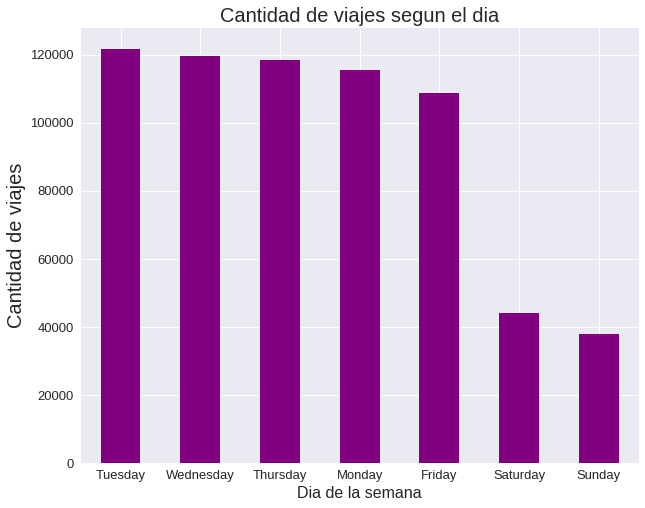

In [47]:
trips['start_day_of_week'].value_counts().plot(kind='bar', rot=0, figsize=(10,8), color='purple' ,fontsize=13);
plt.title('Cantidad de viajes segun el dia', fontsize=20);
plt.xlabel('Dia de la semana', fontsize=16);
plt.ylabel('Cantidad de viajes', fontsize=20);

In [49]:
dias = trips[['start_day_of_week']]
dias_semana = dias[-(dias['start_day_of_week'] == "Saturday")]
dias_semana = dias[-(dias['start_day_of_week'] == "Sunday")]
dias_finde = dias[(dias['start_day_of_week'] == "Saturday") | (dias['start_day_of_week'] == "Sunday")]

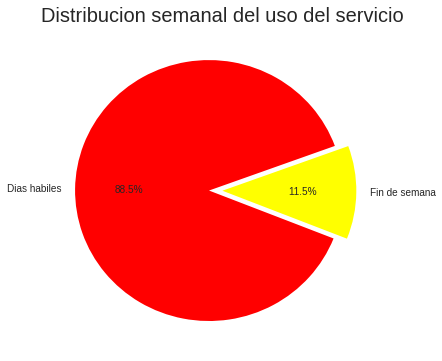

In [50]:
sizes = [dias_semana.start_day_of_week.count(), dias_finde.start_day_of_week.count()]
nombres = ['Dias habiles', 'Fin de semana']

plt.figure(figsize=(6, 6))
plt.title('Distribucion semanal del uso del servicio', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'yellow'], explode=(0.1, 0))
plt.show()

Se ve que hay una diferencia drástica en el uso del servicio entre los días hábiles y el fin de semana.

### Uso del servicio según el horario:

In [51]:
semana_entera = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name']].round()
semana_entera['horario_inicial_float'] = semana_entera['horario_inicial_float'].map(lambda x: x if x != 24 else 0)
# 24hs = 0hs
semana_entera.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name
4,Thursday,12.0,South Van Ness at Market,Market at 10th
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden
9,Thursday,11.0,San Jose City Hall,MLK Library
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden


In [52]:
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Saturday")]
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Sunday")]

In [53]:
semana['apariciones'] = semana['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
horarios_semana = semana[['horario_inicial_float', 'apariciones']]
semana = semana.drop('apariciones', 1) # vuelvo a dejar el dt como antes
horarios_semana_contador = horarios_semana.groupby('horario_inicial_float').aggregate(sum)

/home/rodrigo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


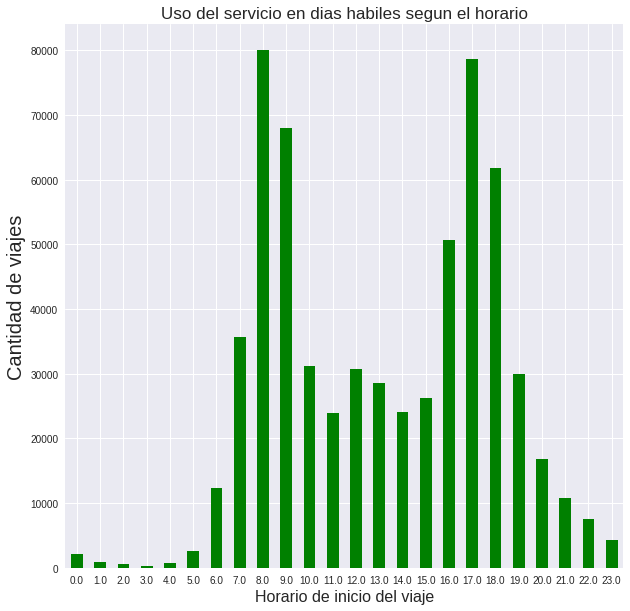

In [54]:
horarios_semana_contador.plot.bar(rot=0, figsize=(10,10), color='green', fontsize=10);
plt.ylabel('Cantidad de viajes', fontsize=20)
plt.xlabel('Horario de inicio del viaje', fontsize=16)
plt.title('Uso del servicio en dias habiles segun el horario', fontsize=17)
plt.legend('')
plt.show()

Se aprecia que durante los días hábiles los horarios pico son a las 8 y 9, y a las 17 y 18, particularmente cuando la gente va y cuando regresa al trabajo, escuela, etc.

In [55]:
finde = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Sunday")]

In [56]:
finde['apariciones'] = finde['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
horarios_finde = finde[['horario_inicial_float', 'apariciones']]
finde = finde.drop('apariciones', 1) # vuelvo a dejar el dt como antes
horarios_finde_contador = horarios_finde.groupby('horario_inicial_float').aggregate(sum)

/home/rodrigo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


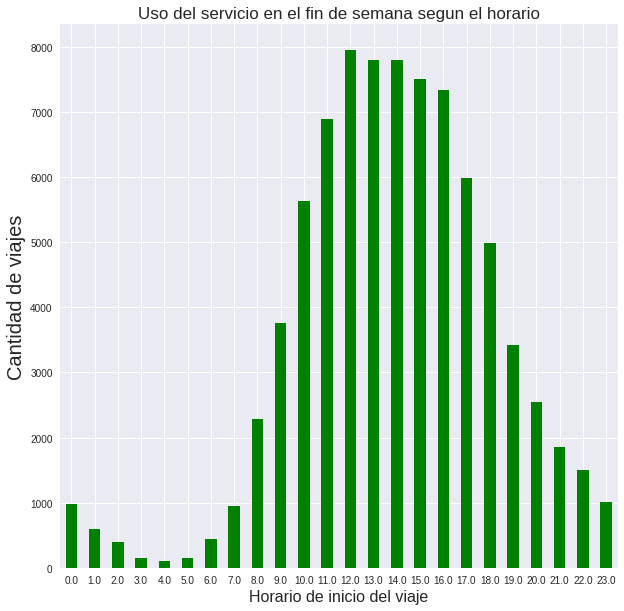

In [57]:
horarios_finde_contador.plot.bar(rot=0, figsize=(10,10), color='green', fontsize=10);
plt.ylabel('Cantidad de viajes', fontsize=20)
plt.xlabel('Horario de inicio del viaje', fontsize=16)
plt.title('Uso del servicio en el fin de semana segun el horario', fontsize=17)
plt.legend('')
plt.show()

Los horarios pico los fines de semana son de 11 a 16. También lo que se observa es la disminución del uso del servicio al llegar la noche a pesar de que sea fin de semana. En el siguiente plot se va a analizar esa comparación.

In [58]:
viajes_en_hora_pico_finde = finde[((finde['horario_inicial_float'] >= 11) & (finde['horario_inicial_float'] <= 16))]
viajes_finde_noche = finde[((finde['horario_inicial_float'] >= 20) & (finde['horario_inicial_float'] < 24))]

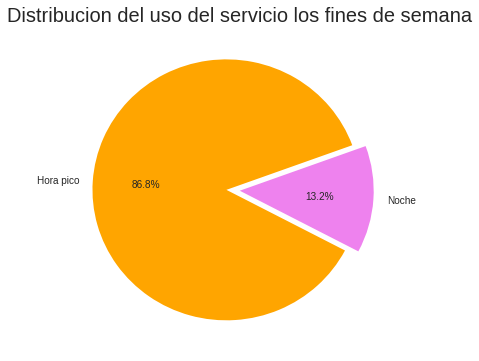

In [59]:
sizes = [viajes_en_hora_pico_finde.start_day_of_week.count(), viajes_finde_noche.start_day_of_week.count()]
nombres = ['Hora pico', 'Noche']

plt.figure(figsize=(6, 6))
plt.title('Distribucion del uso del servicio los fines de semana', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['orange', 'violet'], explode=(0.1, 0))
plt.show()

## A) Análisis de los horarios importantes
### Se analizarán los destinos y trayectos más populares en los horarios importantes de los días hábiles y fin de semana.

In [63]:
viajes_en_hora_pico_semana = semana[((semana['horario_inicial_float'] >= 8) & (semana['horario_inicial_float'] <= 9)) 
                                   | ((semana['horario_inicial_float'] >= 17) & (semana['horario_inicial_float'] <= 18))]

In [64]:
destinos_mas_populares_hora_pico_semana = viajes_en_hora_pico_semana['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_semana = destinos_mas_populares_hora_pico_semana.head(10)

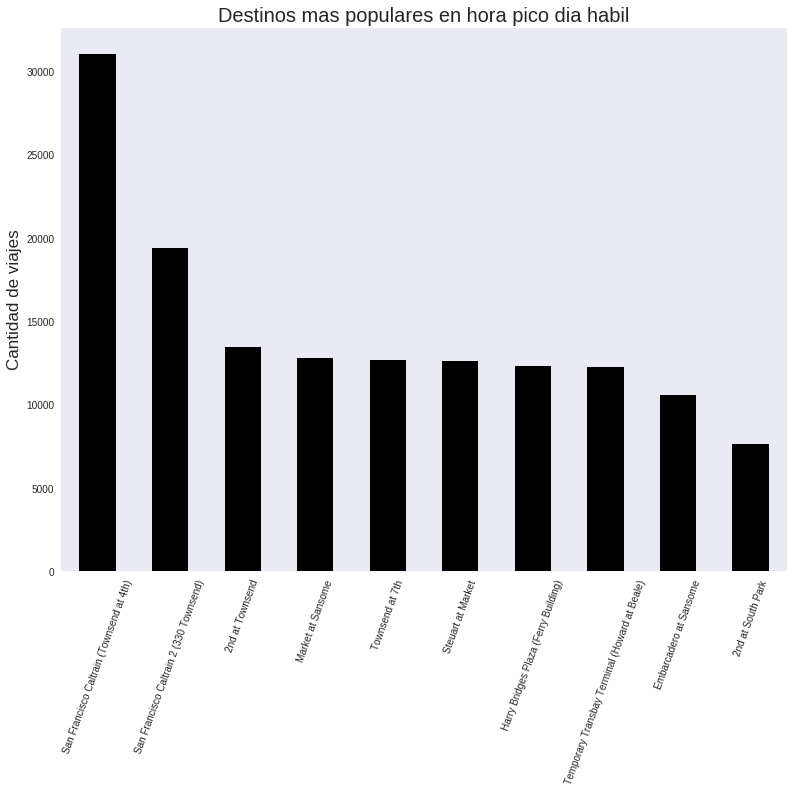

In [65]:
destinos_mas_populares_hora_pico_semana.plot(kind='bar', rot=70, figsize=(13,10), color='black', fontsize=10, grid=False);
plt.title('Destinos mas populares en hora pico dia habil', fontsize=20);
plt.ylabel('Cantidad de viajes', fontsize=17);

Estos son los 10 destinos más populares durante las horas pico en los días hábiles. En los primeros lugares se destaca el Caltrain, donde una gran cantidad de gente se dirige luego de trabajar para regresar a sus casas. Las demás estaciones presentan áreas de mucho movimiento de gente: empresas, comercios, etc, y también se encuentra el puerto, por lo que lo más probable es que la gente se dirija allí para concurrir a trabajar.

In [66]:
# función que dado un dataframe con un campo 'start_station_name' y otro 'end_station_name',
# devuelve un diccionario con los start_station como clave y como valor un diccionario con clave el end_station
# y valor la cantidad de viajes de ese trayecto. También devuelve una lista con el trayecto con mayor cantidad
# de viajes junto con el start y end station del mismo. Orden = O(n) siendo n la cantidad de rows del dataframe.
def contador_viajes(dataframe):
    cont_viajes = {}
    viaje_mas_popular = []
    viaje_mas_popular.append(0)
    viaje_mas_popular.append("")
    viaje_mas_popular.append("")
    for index,row in dataframe.iterrows():
        
        if row['start_station_name'] not in cont_viajes:
            cont_viajes[row['start_station_name']] = {}
           
        if row['end_station_name'] not in cont_viajes[row['start_station_name']]:
            cont_viajes[row['start_station_name']][row['end_station_name']] = 1
        else:
            cont_viajes[row['start_station_name']][row['end_station_name']] += 1
        
        if cont_viajes[row['start_station_name']][row['end_station_name']] > viaje_mas_popular[0]:
            viaje_mas_popular[0] = cont_viajes[row['start_station_name']][row['end_station_name']]
            viaje_mas_popular[1] = row['start_station_name']
            viaje_mas_popular[2] = row['end_station_name']
    
    return cont_viajes,viaje_mas_popular

In [109]:
contador_de_viajes_hora_pico_semana,viaje_mas_popular_hora_pico_semana = contador_viajes(viajes_en_hora_pico_semana)
viaje_mas_popular_hora_pico_semana

[3004, 'San Francisco Caltrain 2 (330 Townsend)', 'Townsend at 7th']

Con esto se ve que el viaje más realizado en hora pico durante los días hábiles es el trayecto San Francisco Caltrain 2 (330 Townsend) - Townsend at 7th. Precisamente como se mencionó anteriormente, lo más probable es que se trate de las personas que van a trabajar y se transportan desde el Caltrain hasta la zona en cuestión.

In [68]:
destinos_mas_populares_hora_pico_finde = viajes_en_hora_pico_finde['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_finde = destinos_mas_populares_hora_pico_finde.head(10)

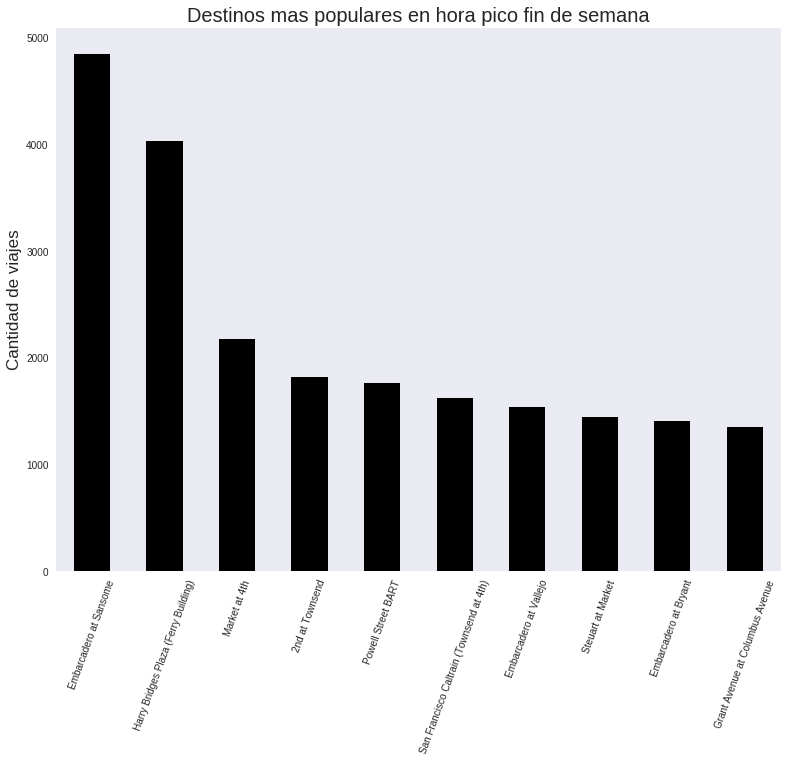

In [69]:
destinos_mas_populares_hora_pico_finde.plot(kind='bar', rot=70, figsize=(13,10), color='black', fontsize=10, grid=False);
plt.title('Destinos mas populares en hora pico fin de semana', fontsize=20);
plt.ylabel('Cantidad de viajes', fontsize=17);

Aqui se encuentran los 10 destinos más populares para las horas pico del fin de semana. Se puede apreciar que los mismos se caracterizan por ser lugares muy atractivos para pasear y hacer actividades de ocio.

In [70]:
contador_de_viajes_hora_pico_finde,viaje_mas_popular_hora_pico_finde = contador_viajes(viajes_en_hora_pico_finde)
viaje_mas_popular_hora_pico_finde

[1068, 'Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome']

Con esto se ve que el viaje más realizado en hora pico durante el fin de semana es el trayecto Harry Bridges Plaza (Ferry Building) - Embarcadero at Sansome. Además estos dos son los destinos más concurridos las horas pico de los fines de semana. Un posible uso de esta información podría ser para fines comerciales, ya que esto da la pauta que por esta zona es donde más concentración de gente se encuentra.

In [71]:
viernes_y_sab = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Friday")]
viernes_y_sab_noche = viernes_y_sab[(viernes_y_sab['horario_inicial_float'] >= 20) & (viernes_y_sab['horario_inicial_float'] < 24)]

In [72]:
destinos_mas_populares_viernes_y_sab_noche = viernes_y_sab_noche['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_viernes_y_sab_noche = destinos_mas_populares_viernes_y_sab_noche.head(10)

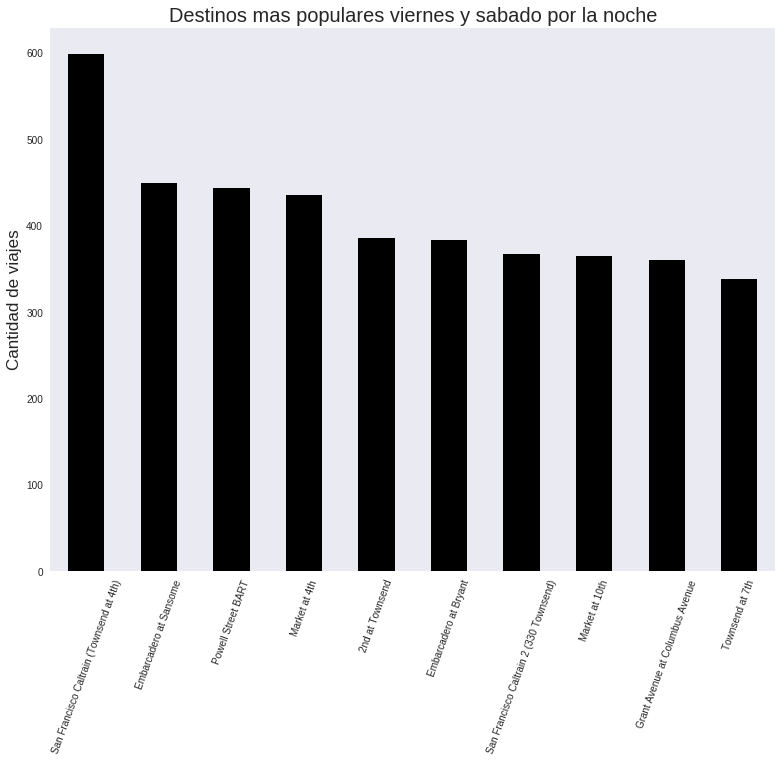

In [73]:
destinos_mas_populares_viernes_y_sab_noche.plot(kind='bar', rot=70, figsize=(13,10), color='black', fontsize=10, grid=False);
plt.title('Destinos mas populares viernes y sabado por la noche', fontsize=20);
plt.ylabel('Cantidad de viajes', fontsize=17);

Estos son los destinos más frecuentados los viernes y sábados por la noche. Se analizó aparte del domingo ya que estos son los días que al día siguiente por lo general no se trabaja/concurre a estudiar, por lo que la gente se podría dormir más tarde y planear otro tipo de salida. Se destacan entre los lugares más frecuentados las estaciones Powell Street BART y Market at 4th, las cuales están rodeadas de shoppings, restaurantes y demás.

## B) Análisis relacionado a las duraciones de los viajes
### B.1) - ¿Viajes más largos en días hábiles o el fin de semana?

In [74]:
semana_entera_con_duracion = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name','duracion_viaje','duration']].round()
semana_entera_con_duracion.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name,duracion_viaje,duration
4,Thursday,12.0,South Van Ness at Market,Market at 10th,00:02:00,83
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden,00:02:00,109
9,Thursday,11.0,San Jose City Hall,MLK Library,00:02:00,114
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant,00:03:00,125
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden,00:02:00,126


In [75]:
semana_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['start_day_of_week'] == "Saturday")]
semana_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['start_day_of_week'] == "Sunday")]

In [76]:
finde_con_duracion = semana_entera_con_duracion[(semana_entera_con_duracion['start_day_of_week'] == "Saturday") | (semana_entera_con_duracion['start_day_of_week'] == "Sunday")]

In [77]:
semana_con_duracion.duration.mean() / 60 # resultado en minutos

13.909346143479581

In [78]:
finde_con_duracion.duration.mean() / 60 # resultado en minutos

31.908434371772668

Los viajes en promedio duran más los fines de semana. Esto tiene lógica ya que los fines de semana la gente puede usar más tiempo para pasear con la bicileta sin tener un destino en particular cuando durante los días hábiles la gente busca ir al trabajo o lugar donde ejercer sus obligaciones.
Igualmente hay que considerar que esta estadística podría estar dañada por muchos viajes "largos" en el fin de semana, por ejemplo de más de dos horas, que harían subir el promedio general, sin haber tantos viajes con un horario parecido al promedio calculado. A continuación se analizará eso:

In [79]:
semana_con_duracion[semana_con_duracion['duracion_viaje'] > "02:00:00"].start_day_of_week.count()

8776

In [80]:
finde_con_duracion[finde_con_duracion['duracion_viaje'] > "02:00:00"].start_day_of_week.count()

5094

Se observa que tanto en los días hábiles como los fines de semana hay viajes de más de 2 horas, y que ya que los días hábiles son más que el fin de semana y la estadística muestra que son casi el doble de viajes, en promedio esos viajes largos se dan por igual todos los días, por lo que el probema de que haya viajes largos no afecta el resultado de la estadística anterior.

### B.2) - Trayectos interesantes
### A continuación se analizarán los trayectos más frecuentes según un criterio de duración y demás fitros.

In [81]:
finde_viajes_largos = finde_con_duracion[finde_con_duracion['duracion_viaje'] > "00:30:00"]

In [82]:
contador_de_viajes_largos_finde,viaje_largo_mas_popular_finde = contador_viajes(finde_viajes_largos)
viaje_largo_mas_popular_finde

[561,
 'Harry Bridges Plaza (Ferry Building)',
 'Harry Bridges Plaza (Ferry Building)']

Con esto se ve que los viajes mayores a 30 minutos los fines de semana son tanto de inicio como fin la estación Harry Bridges Plaza (Ferry Building). El objetivo de este análisis fue encontrar el trayecto más popular de los fines de semana que sea orientado a pasear (por eso el filtro de la duración). El resultado muestra que el viaje más realizado es empezar en dicha estación, recorrer por más de 30 minutos, y luego volver a esta misma dejar la bicicleta.

In [83]:
harry_harry = finde_viajes_largos[(finde_viajes_largos['start_station_name'] == 'Harry Bridges Plaza (Ferry Building)') & (finde_viajes_largos['end_station_name'] == 'Harry Bridges Plaza (Ferry Building)')]
harry_harry.describe()

,horario_inicial_float,duracion_viaje,duration
count,561.000000,561,561.000000
mean,13.178253,0 days 02:35:52.085561,9349.684492
std,3.028488,0 days 01:49:11.726171,6551.425814
min,5.000000,0 days 00:31:00,1811.000000
25%,11.000000,0 days 01:13:00,4392.000000
50%,13.000000,0 days 01:59:00,7126.000000
75%,15.000000,0 days 03:54:00,14073.000000
max,21.000000,0 days 08:13:00,29629.000000


Como se puede apreciar, estos viajes se caracterizan por su duración promedio de 2 horas y media y que en promedio salen a las 13hs. Esto da la pauta de qué elige la mayoría de gente a la hora de pasear por un largo rato aprovechando el clima de recién entrada la tarde.

In [84]:
semana_viajes_cortos = semana_con_duracion[(semana_con_duracion['duracion_viaje'] > "00:08:00") & (semana_con_duracion['duracion_viaje'] < "00:20:00")]

In [85]:
contador_de_viajes_cortos_semana,viaje_corto_mas_popular_semana = contador_viajes(semana_viajes_cortos)
viaje_corto_mas_popular_semana

[3247, 'Steuart at Market', 'San Francisco Caltrain (Townsend at 4th)']

In [86]:
steuart_caltrain = semana_viajes_cortos[(semana_viajes_cortos['start_station_name'] == 'Steuart at Market') & (semana_viajes_cortos['end_station_name'] == 'San Francisco Caltrain (Townsend at 4th)')]
steuart_caltrain.describe()

,horario_inicial_float,duracion_viaje,duration
count,3247.000000,3247,3247.000000
mean,14.825685,0 days 00:11:38.158299,697.412073
std,3.959800,0 days 00:01:58.426460,116.468743
min,0.000000,0 days 00:09:00,486.000000
25%,14.000000,0 days 00:10:00,615.000000
50%,16.000000,0 days 00:11:00,673.000000
75%,17.000000,0 days 00:13:00,757.000000
max,23.000000,0 days 00:19:00,1182.000000


Con esto se ve que el viaje entre 8 y 20 minutos más popular en días hábiles es el trayecto Steuart at Market - San Francisco Caltrain (Townsend at 4th). El objetivo de este análisis fue encontrar el trayecto con una duración normal que más se haga considerando el tráfico que presenta un día hábil. Una posible conclusión debido a la hora promedio de comienzo de los viajes (15hs) es que la gente al terminar de trabajar se dirige desde Steuart at Market (un lugar con mucho movimiento por lo que deducimos que mucha gente trabaja por esa zona) en bicicleta hasta el Caltrain, y toma este transporte para volver a sus casas. 
Cabe mencionar que este trayecto tiene más viajes que el visto anteriormente en hora pico de días hábiles (que posee 3004), por lo que se concluye que para volver del trabajo a sus hogares se usa más el servicio que al ir al mismo. Esto tiene lógica ya que a la mañana generalmente se tiende a llegar sobre la hora, y aparte se requiere un esfuerzo energético.

# 2) Análisis de la influencia de ciertas fechas en los viajes

A continuación se estudiará el comportamiento del servicio en fechas particulares. Para eso se hará un plot con los viajes a medida que transcurre el año. Se tomó el 2014 debido a que el 2013 y 2015 no tienen datos de todo el año entero.

In [87]:
# funciones para operar con un formato fecha (anio-mes-dia hora:minutos:segundos)
def obtener_dia(fecha):
    return fecha.day
def obtener_mes(fecha):
    return fecha.month
def fecha_sin_hora(fecha):
    return (str(fecha.year) + "-" + str(fecha.month) + "-" + str(fecha.day))

In [88]:
anio_2014 = trips[['start_date','start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name','duracion_viaje', 'duration','subscription_type']].round()
anio_2014['horario_inicial_float'] = anio_2014['horario_inicial_float'].map(lambda x: x if x != 24 else 0)
anio_2014 = anio_2014[(anio_2014['start_date'].dt.year) == 2014]
anio_2014['fecha_sin_horario'] = anio_2014['start_date'].map(fecha_sin_hora)
anio_2014['fecha_sin_horario'] = pd.to_datetime(anio_2014['fecha_sin_horario'])
anio_2014['dia'] = anio_2014['start_date'].map(obtener_dia)
anio_2014['mes'] = anio_2014['start_date'].map(obtener_mes)
anio_2014 = anio_2014.sort_values(by='start_date')
anio_2014.head()

,start_date,start_day_of_week,horario_inicial_float,start_station_name,end_station_name,duracion_viaje,duration,subscription_type,fecha_sin_horario,dia,mes
100563,2014-01-01 00:14:00,Wednesday,0.0,San Francisco City Hall,Townsend at 7th,00:07:00,435,Subscriber,2014-01-01,1,1
100564,2014-01-01 00:14:00,Wednesday,0.0,San Francisco City Hall,Townsend at 7th,00:07:00,432,Subscriber,2014-01-01,1,1
100565,2014-01-01 00:17:00,Wednesday,0.0,Embarcadero at Sansome,Beale at Market,00:25:00,1523,Subscriber,2014-01-01,1,1
100566,2014-01-01 00:23:00,Wednesday,0.0,Steuart at Market,Powell Street BART,00:27:00,1620,Customer,2014-01-01,1,1
100567,2014-01-01 00:23:00,Wednesday,0.0,Steuart at Market,Powell Street BART,00:27:00,1617,Customer,2014-01-01,1,1


In [89]:
anio_2014['viaje'] = anio_2014['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
viajes_segun_dia = anio_2014[['fecha_sin_horario', 'viaje']]
anio_2014 = anio_2014.drop('viaje', 1) # vuelvo a dejar el dt como antes
viajes_segun_dia_contador = viajes_segun_dia.groupby('fecha_sin_horario').aggregate(sum)
viajes_segun_dia_contador.head()

,viaje
fecha_sin_horario,
2014-01-01,351
2014-01-02,760
2014-01-03,774
2014-01-04,354
2014-01-05,293


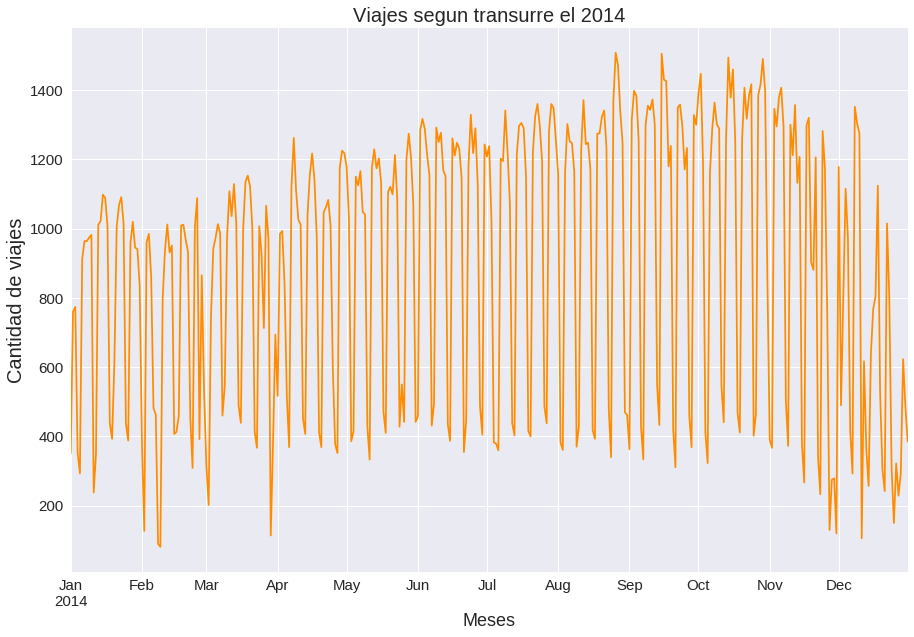

In [90]:
viajes_segun_dia_contador.plot.line(figsize=(15,10), color='darkorange', fontsize=15);
plt.xlabel('Meses', fontsize=18)
plt.ylabel('Cantidad de viajes', fontsize=20)
plt.title('Viajes segun transurre el 2014', fontsize=20);
plt.grid(True)
plt.legend('');
plt.show()

En primer lugar se pueden observar picos en fechas como Halloween (fines octubre) y Homecoming (principios octubre). Luego se puede notar como decae el uso del servicio en feriados como por ejemplo en día de acción de gracias (fines noviembre), navidad, semana santa (fines marzo) y demás. También otra observación es la diferencia de viajes que se hacen en inviero en comparación al resto del año. 

In [91]:
viajes_segun_dia_contador[viajes_segun_dia_contador['viaje'] > 1400]

,viaje
fecha_sin_horario,
2014-08-26,1508
2014-08-27,1473
2014-09-15,1505
2014-09-16,1430
2014-09-17,1426
2014-10-02,1447
2014-10-14,1494
2014-10-16,1460
2014-10-21,1407


In [92]:
viajes_segun_dia_contador[viajes_segun_dia_contador['viaje'] < 200]

,viaje
fecha_sin_horario,
2014-02-02,127
2014-02-08,90
2014-02-09,81
2014-03-29,114
2014-11-27,130
2014-11-30,120
2014-12-11,106
2014-12-25,150


## ¿Los días con picos de viajes atraen a clientes no suscriptos al servicio?
Se analizará cuánta gente no suscripta usa el servicio en días festivos como Halloween.

In [93]:
halloween = anio_2014[anio_2014['fecha_sin_horario'] == "2014-10-29"].subscription_type.value_counts()

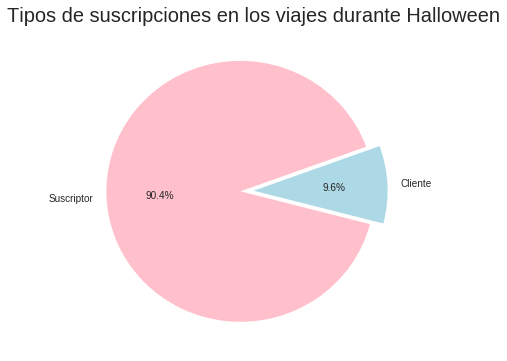

In [94]:
sizes = [halloween.Subscriber, halloween.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Tipos de suscripciones en los viajes durante Halloween', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'lightblue'], explode=(0.1, 0))
plt.show()

En una primera instancia el valor es bajo a pesar de ser Halloween. Ahora se va a buscar como es normalmente la relación Suscriptor-Cliente en porcentajes y también la diferencia en cantidad de viajes para comparar. Tomamos el promedio de un mes el cual se mantenga estable, sin picos, como por ejemplo junio.

In [95]:
junio = anio_2014[anio_2014['mes'] == 6]
suscripciones_junio = junio.subscription_type.value_counts()
dia_promedio_junio = suscripciones_junio / 30

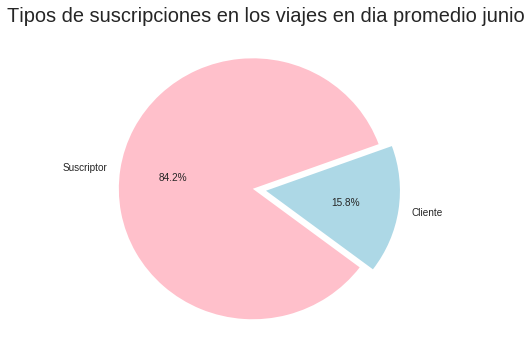

In [96]:
sizes = [dia_promedio_junio.Subscriber, dia_promedio_junio.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Tipos de suscripciones en los viajes en dia promedio junio', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'lightblue'], explode=(0.1, 0))
plt.show()

In [97]:
halloween

Subscriber    1347
Customer       143
Name: subscription_type, dtype: int64

In [98]:
dia_promedio_junio

Subscriber    835.466667
Customer      157.300000
Name: subscription_type, dtype: float64

Se ve que en promedio los días comunes tienen un mayor porcentaje de clientes. Y tampoco influye que en Halloween sean más viajes ya que el aumento sólo se nota en suscriptores y no en clientes. Al contrario de lo que uno esperaría, en Halloween la gente no suscripta al servicio no lo toma en cuenta como una opción.

# 3) Análisis final: análisis a gran escala
## ¿El servicio creció con el paso del tiempo?
A continuación se analizará si con el correr del tiempo el servició aumentó en cantidad de viajes y de suscriptores.

In [99]:
viajes_anios = trips[['start_date', 'subscription_type']]
_2013 = viajes_anios[(viajes_anios['start_date'].dt.year) == 2013]
_2013 = _2013.sort_values(by='start_date')
_2014 = viajes_anios[(viajes_anios['start_date'].dt.year) == 2014]
_2014 = _2014.sort_values(by='start_date')
_2015 = viajes_anios[(viajes_anios['start_date'].dt.year) == 2015]
_2015 = _2015.sort_values(by='start_date')

In [100]:
_2013.head()

,start_date,subscription_type
541,2013-08-29 09:24:00,Subscriber
570,2013-08-29 09:24:00,Subscriber
565,2013-08-29 09:24:00,Subscriber
566,2013-08-29 09:25:00,Subscriber
719,2013-08-29 09:31:00,Customer


Ya que el año 2013 sólo tiene datos a partir de septiembre y 2015 hasta agosto, se tomarán los últimos 4 meses de cada año para poder realizar la comparación.

In [101]:
_2013 = _2013[_2013['start_date'].dt.month >= 9] # elimino los pocos datos de agosto que había
_2014 = _2014[_2014['start_date'].dt.month >= 9] 
_2015 = _2015[_2015['start_date'].dt.month >= 5] 

In [102]:
viajes = [_2013.start_date.count(), _2014.start_date.count(), _2015.start_date.count()]
anios = [2013,2014,2015]

In [103]:
d = {'cantidad_viajes': viajes, 'anio': anios}
viajes_por_anio = pd.DataFrame(data=d)
viajes_por_anio = viajes_por_anio.groupby('anio').aggregate(sum)

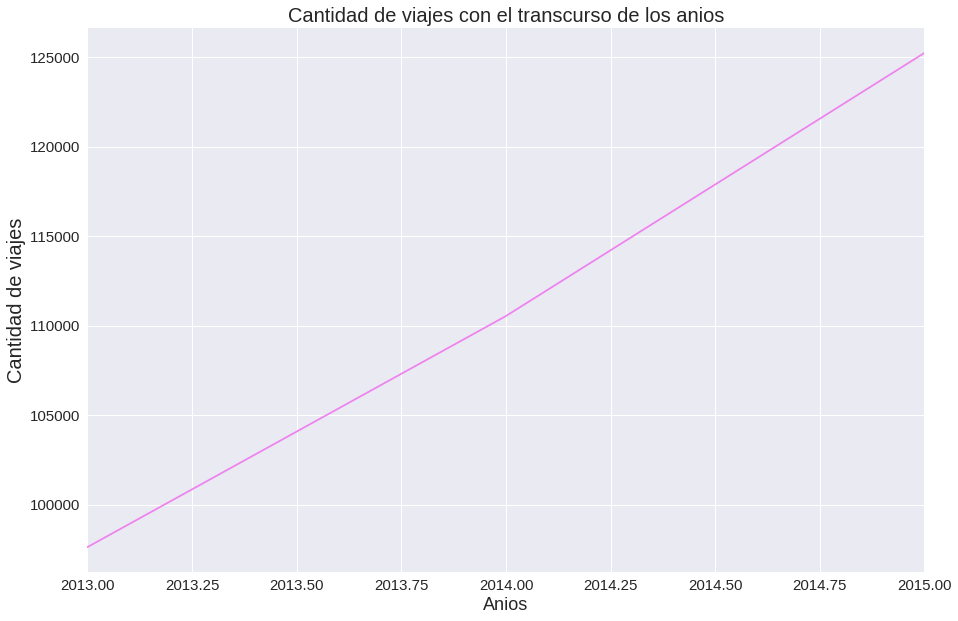

In [104]:
viajes_por_anio.plot.line(figsize=(15,10), color='violet', fontsize=15);
plt.xlabel('Anios', fontsize=18)
plt.ylabel('Cantidad de viajes', fontsize=20)
plt.title('Cantidad de viajes con el transcurso de los anios', fontsize=20)
plt.grid(True)
plt.legend('');
plt.show()

Como se puede apreciar, con el transcurso de los años los viajes aumentan en forma lineal, por lo que se puede concluir que con el correr del tiempo el servicio cada vez se utiliza más.

## ¿Cómo cambia el porcentaje de viaje de suscriptos con el correr de los años? 

In [105]:
suscripciones_2013 = _2013.subscription_type.value_counts()
suscripciones_2014 = _2014.subscription_type.value_counts()
suscripciones_2015 = _2015.subscription_type.value_counts()

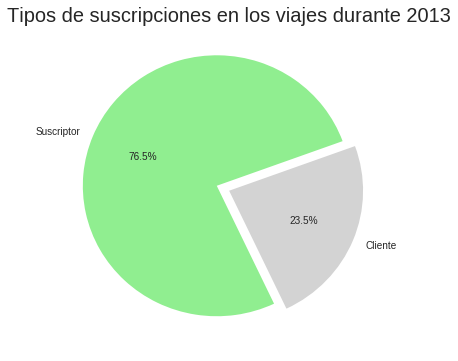

In [106]:
sizes = [suscripciones_2013.Subscriber, suscripciones_2013.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Tipos de suscripciones en los viajes durante 2013', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightgray'], explode=(0.1, 0))
plt.show()

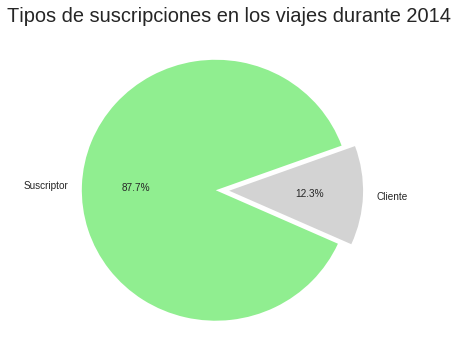

In [107]:
sizes = [suscripciones_2014.Subscriber, suscripciones_2014.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Tipos de suscripciones en los viajes durante 2014', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightgray'], explode=(0.1, 0))
plt.show()

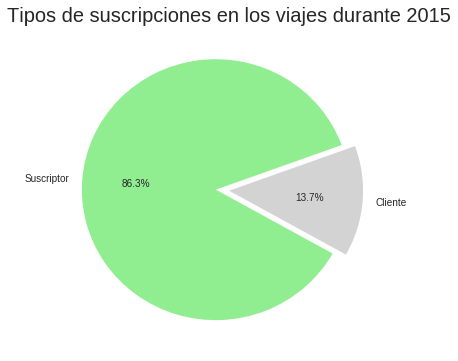

In [108]:
sizes = [suscripciones_2015.Subscriber, suscripciones_2015.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Tipos de suscripciones en los viajes durante 2015', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightgray'], explode=(0.1, 0))
plt.show()

Se observa que del 2013 al 2014 hubo un importante aumento en la cantidad de viajes realizados por suscriptores (esto también nos podría decir que los mismos también han aumentado), y luego del 2014 al 2015 esa relación se mantuvo igual. Igualmente como vimos anteriormente del 2014 al 2015 hubo un aumento de viajes, y, como el porcentaje de viajes hechos por suscriptores se mantuvo, implica que en cantidad estos viajes aumentaron y por lo tanto también podriamos decir que los suscriptores lo han hecho.